<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Pillow - Generate a certificate template
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Pillow/Pillow_Generate_A_Certificate_Template.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #Pillow #Python #certificate-template #naas

**Author:** [Suhas B](https://www.linkedin.com/in/suhasbrao/)

This notebook allows you to generate a certificate for Github contributors using a pre-existing template.

## Input

### Import libraries

In [7]:
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
from bs4 import BeautifulSoup

### Variables

In [8]:
# Modify these as per your needs
org_profile_url = "https://github.com/jupyter-naas"
repo_name = "awesome-notebooks"
date_of_contribution = "04/10/2022"
contributor_name = "Suhas B"
issue_name = "Pillow - Generate a certificate template #1212"
issue_id = "1212"
pr_name = "Python - Locate_addresses #1205"


# These are accessed later by few functions
template_path = "certificate-template.png"
default_font_path = "Certificate-template-fonts/Roboto-Regular.ttf"
content_font_path = "Certificate-template-fonts/AnonymousPro-Regular.ttf"

In [9]:
# access repo url and organization names from repo_url
repo_url = org_profile_url + f'/{repo_name}'
org_name = org_profile_url[19:].capitalize()
print(repo_url)
print(org_name)

https://github.com/jupyter-naas/awesome-notebooks
Jupyter-naas


## Model

### Functions to generate the certificate

In [10]:
def fetch_org_contents(org_profile_url: str):
    
    github_html = requests.get(org_profile_url).text
    soup = BeautifulSoup(github_html, "html.parser")
    
    avatar_block = soup.find_all('img',class_='avatar')
    logo_url = img_url = avatar_block[4].get('src')
    
    bio_block = soup.find_all(class_='color-fg-muted')

    org_bio = bio_block[9].text
    
    print(logo_url)
    print(org_bio)
    
    return logo_url, org_bio
    
logo_url, org_bio = fetch_org_contents(org_profile_url)

https://avatars.githubusercontent.com/u/71603764?s=200&v=4
All-in-one open source data platform, based on @jupyter


In [11]:
def write_content(certificate_path: str, default_font_path: str, 
                  content_font_path: str, logo_url: str, org_bio:str):
    
    logo_pos = (100, 150)
    bio_pos = (320, 270)
    
    date_pos = (120, 450)
    name_pos = (120, 550)
    issue_pos = (120,750)
    pr_pos = (355, 820)
    
    logo_img = Image.open(requests.get(logo_url, stream=True).raw).convert("RGBA")
       
    # opens the image
    img = Image.open(certificate_path, mode ='r')
    
    # overlays image
    img.paste(logo_img, logo_pos, mask = logo_img)
    
        # gets the image width
    image_width = img.width
          
        # gets the image height
    image_height = img.height 
   
        # creates a drawing canvas overlay 
        # on top of the image
    draw = ImageDraw.Draw(img)
   
    # gets the font object from the 
    # font file (TTF)
    
    name_font = ImageFont.truetype(
            content_font_path,
            70 # change this according to your needs
        )
    org_name_font = ImageFont.truetype(
            content_font_path,
            40 # change this according to your needs
        )
    
    default_font = ImageFont.truetype(
            default_font_path,
            24 # change this according to your needs
        )
    
    date_font = ImageFont.truetype(
            content_font_path,
            28 # change this according to your needs
        )
    
    issue_font = ImageFont.truetype(
            content_font_path,
            32 # change this according to your needs
        )
    
    pr_font = ImageFont.truetype(
            content_font_path,
            30 # change this according to your needs
        )
    
    # Writing the content on the image 
    draw.text((320,200), org_name,
            fill="black", font = org_name_font)
    
    draw.text(bio_pos, org_bio,
            fill="black", font = default_font)
    
    draw.text(date_pos, date_of_contribution,
            fill="black", font = date_font)
    
    draw.text(name_pos,contributor_name,
            fill="black", font = name_font)
    
    draw.text((120,690),"has successfully solved the issue",
            fill="black", font = default_font)
    
    draw.text(issue_pos, issue_name,
            fill="black", font = issue_font)
    
    draw.text((120, 820), "with the Pull Request",
            fill="black", font = default_font)
    
    draw.text(pr_pos, pr_name, fill="grey", font = pr_font)
    
    draw.text((120, 860), "on the Github Repository",
            fill="black", font = default_font)
    
    draw.text((395, 860), repo_url,
            fill="grey", font = default_font)
    
    draw.text((120, 1050), "Verify at:", fill="black",
             font=default_font)
    
    draw.text((220,1050), repo_url+ '/issues/'+ issue_id, font= default_font,fill="black")
    
    # saves the image in png format with file name as contributor name
    img.save("{}.png".format(contributor_name)) 

In [12]:
write_content(template_path, default_font_path, content_font_path, logo_url,
             org_bio)

## Output

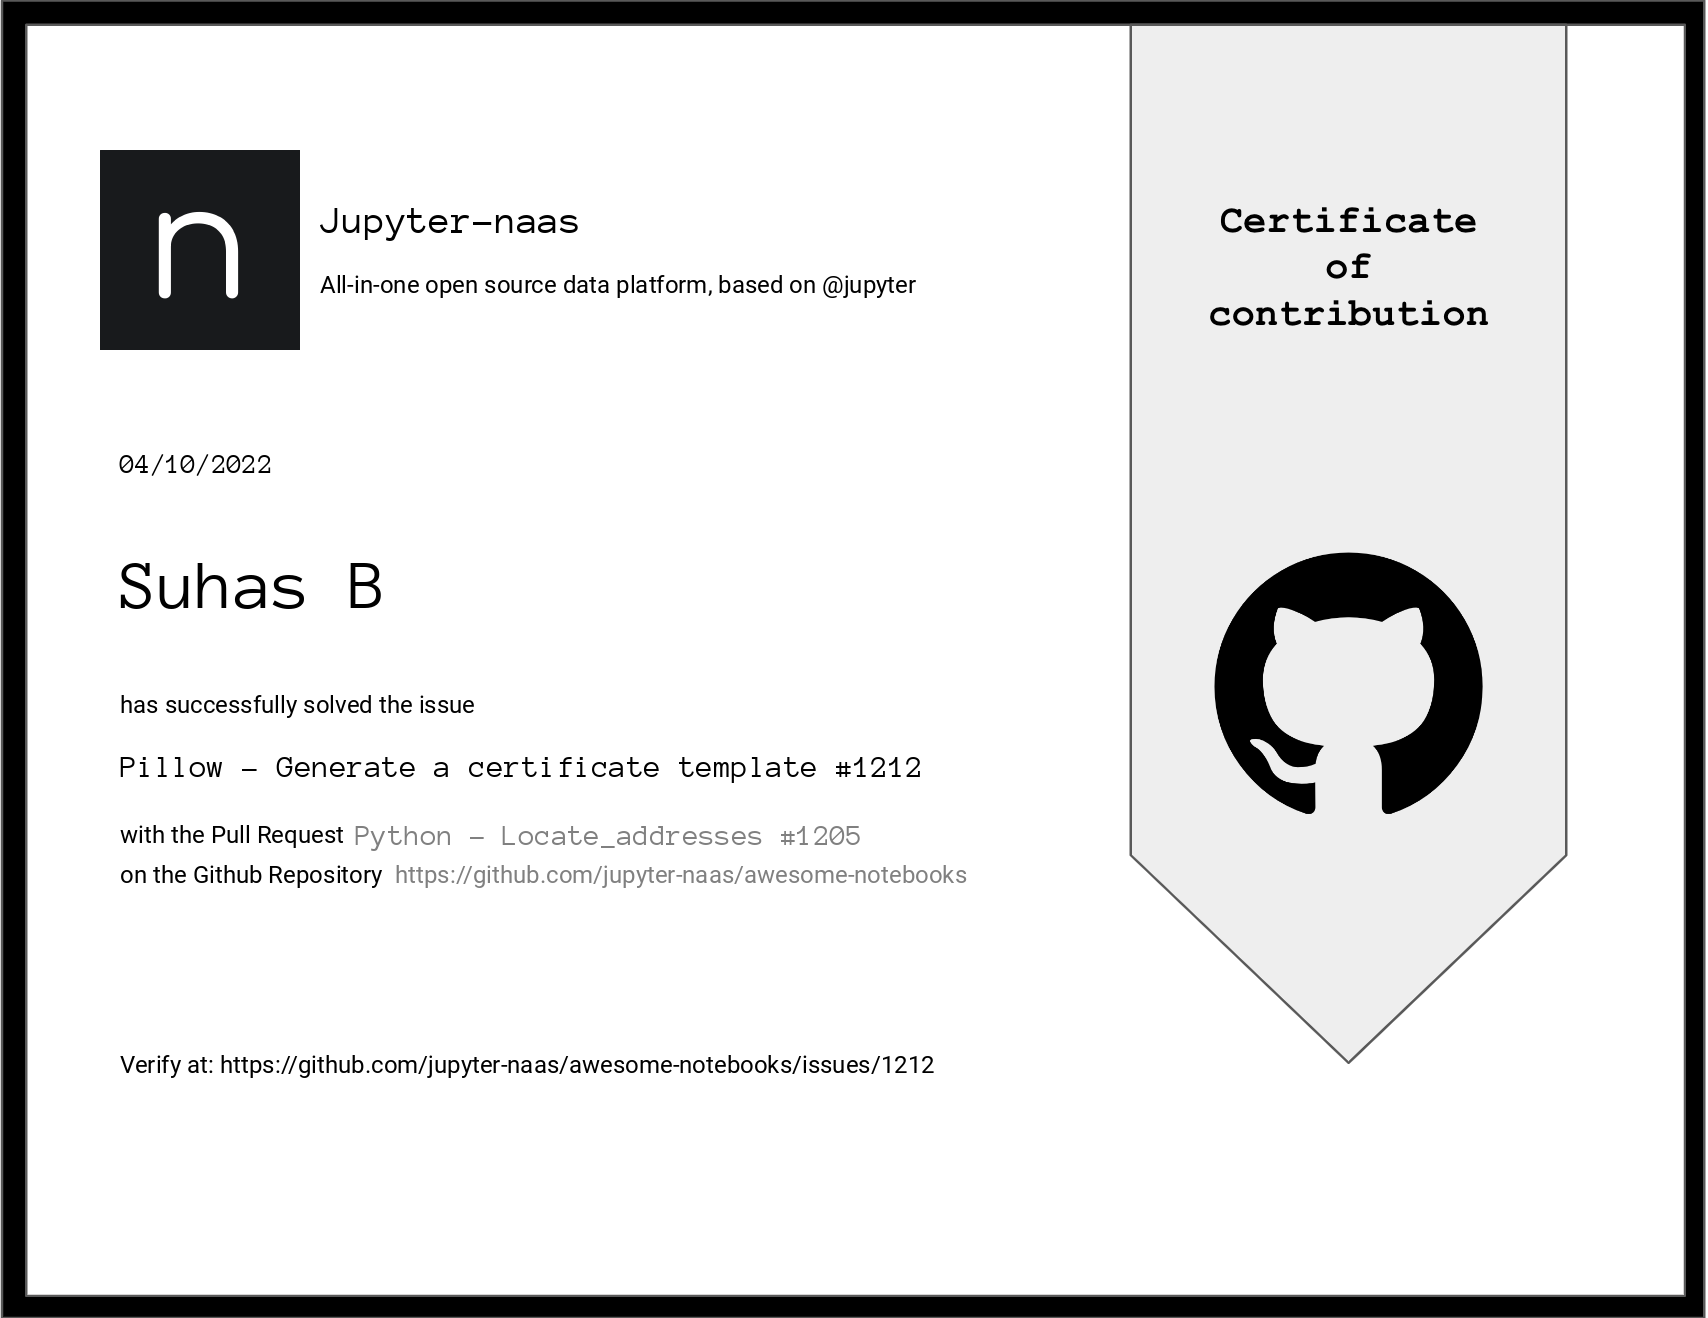

In [13]:
output = Image.open(contributor_name + '.png')
output.show()